In [1]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



                                        studyUID  patient_id  fibrosis-Amit  \
0   2.25.151381364609798322676278269381385726101      349083             35   
1   2.25.167372640697919929902164027163864542030      349086             26   
2   2.25.203973463754770981792232862473688168375      349087             14   
3   2.25.216283113382784026636267261939114924832      349081             61   
4   2.25.221058046032357948728258383661711473328      349093             60   
5   2.25.232582791538005160080971896794988597956      349095             15   
6   2.25.284861718200016017166547777228412707191      349089             25   
7   2.25.295801654971975741640282033013061930731      349104             22   
8      2.25.380626357412436661274227771918760742      349079             25   
9    2.25.53148617108557862603965981880595662674      349102              9   
10   2.25.68129857782908845466287502318659855334      349082             20   
11   4.1.113453313111044526189508214191578352716    

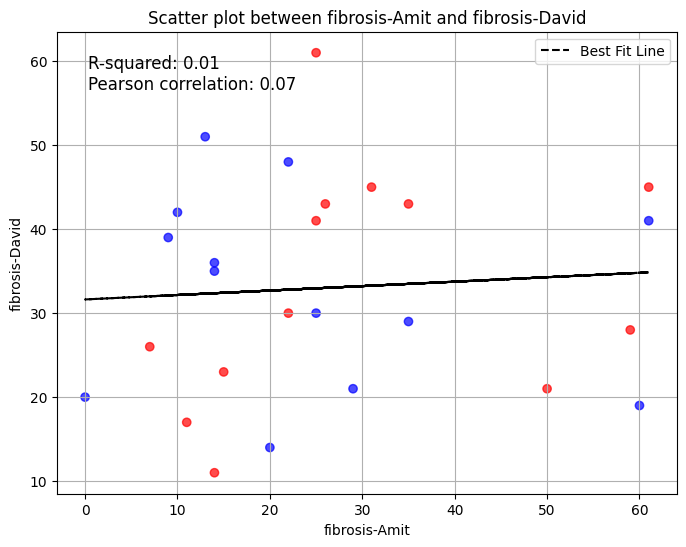

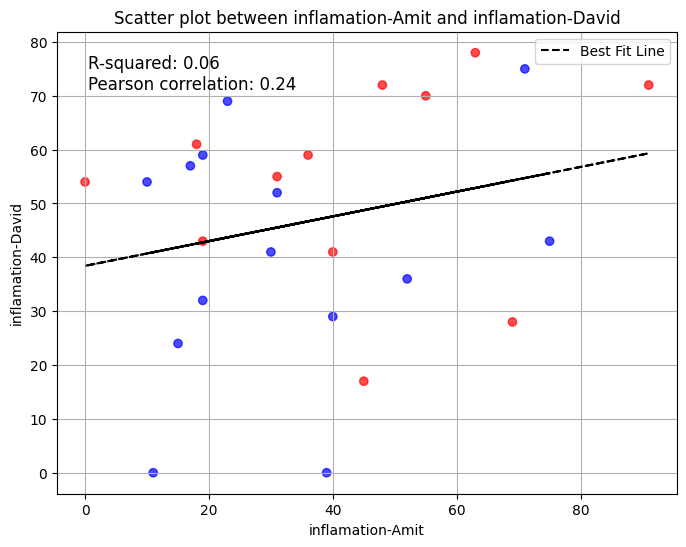

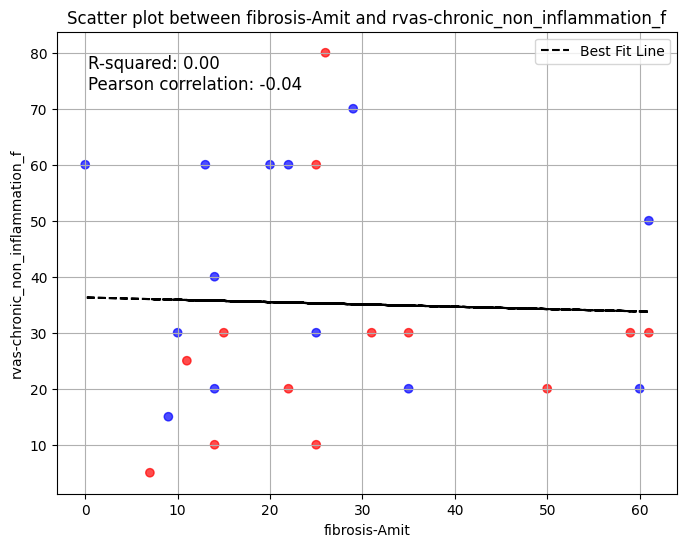

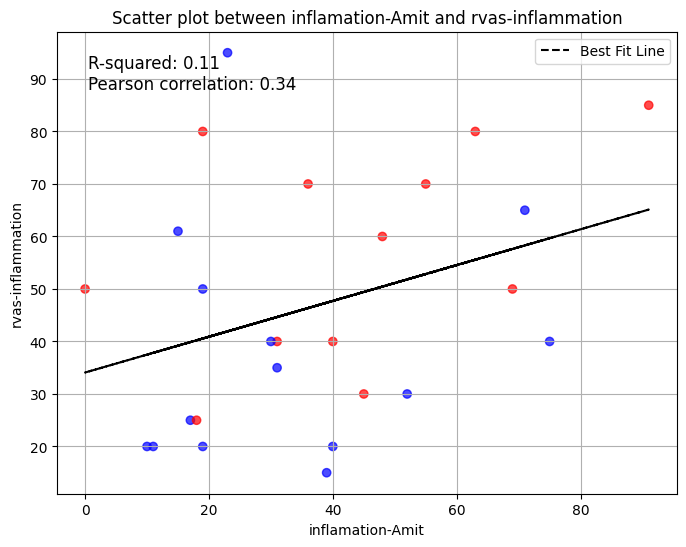

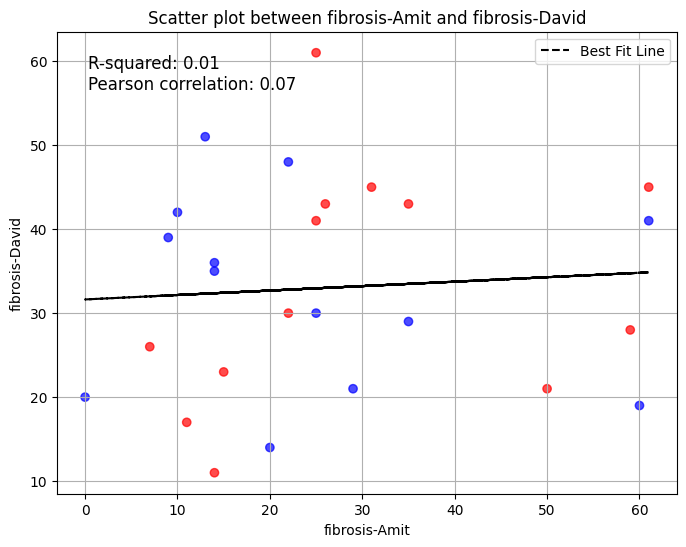

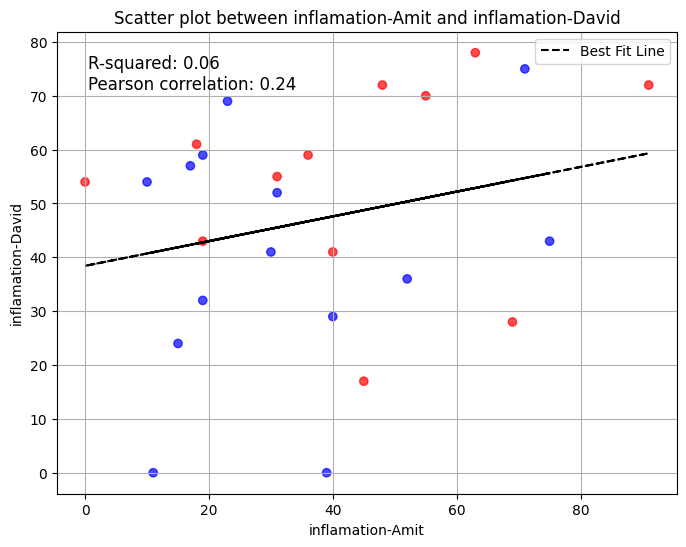

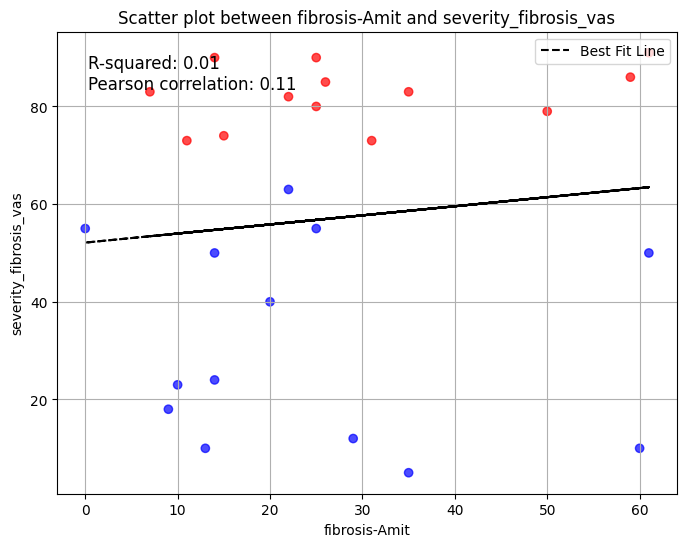

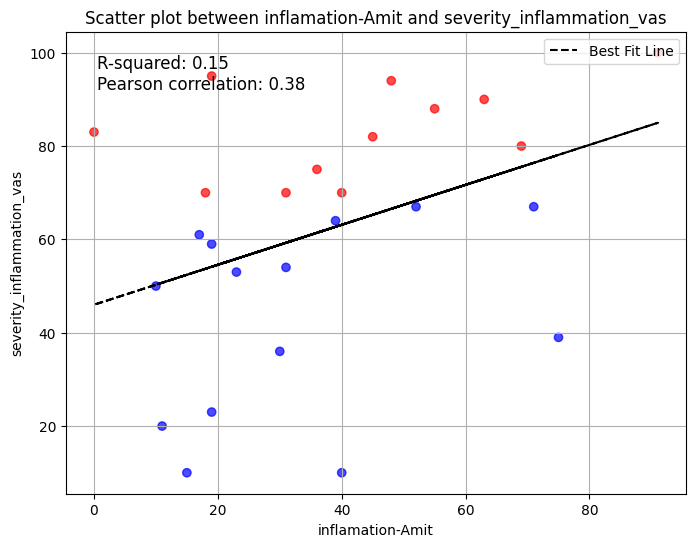

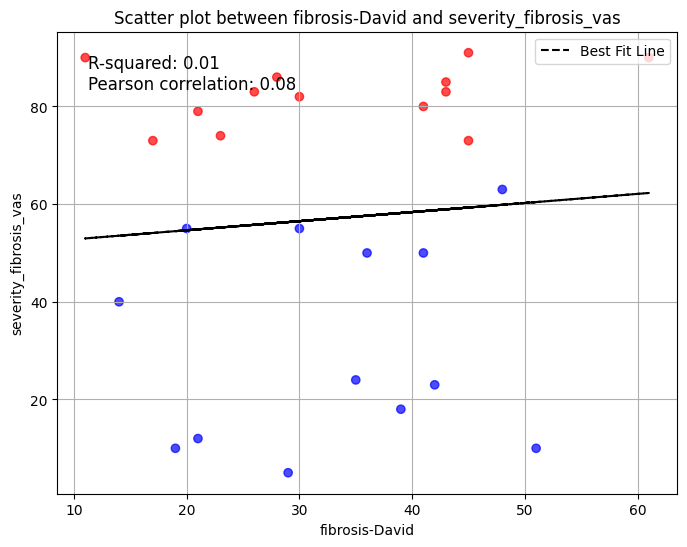

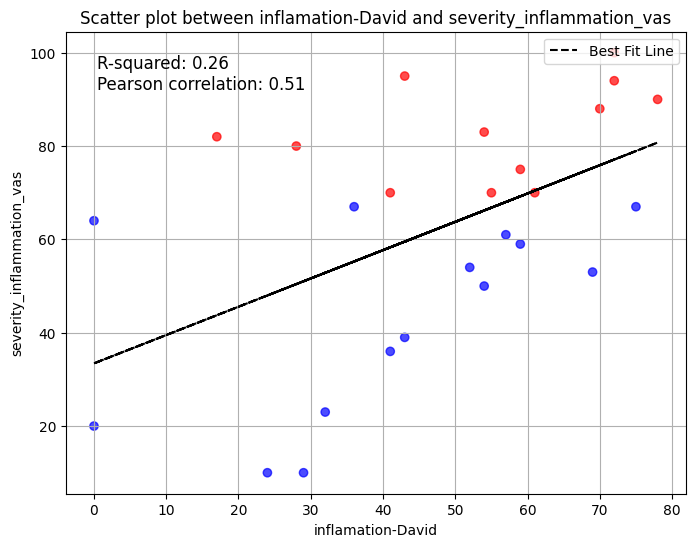

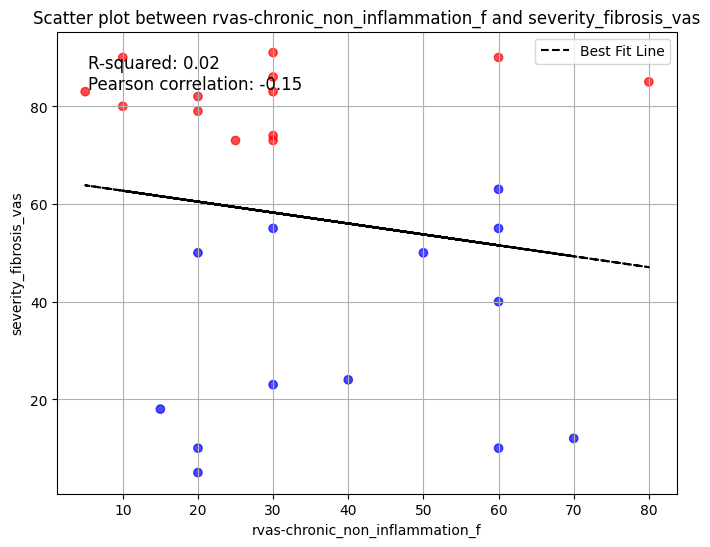

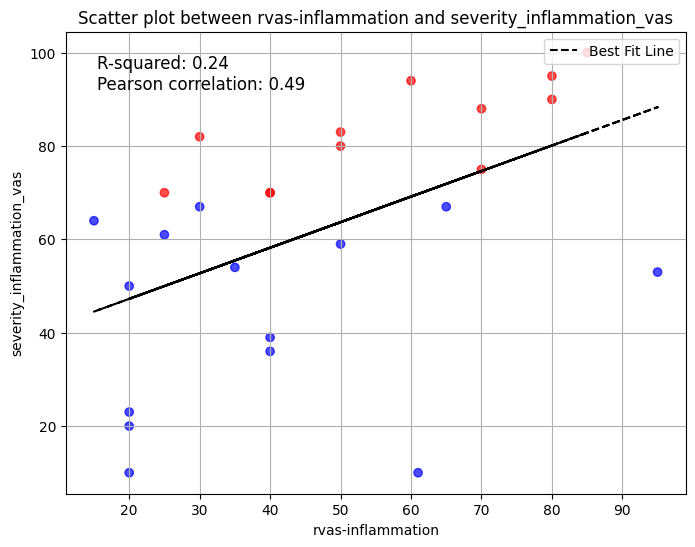

In [2]:
import pandas as pd
from rad_reader import scatter_with_best_fit

                                        studyUID  patient_id  fibrosis-Amit  \
0   2.25.151381364609798322676278269381385726101      349083             35   
1   2.25.167372640697919929902164027163864542030      349086             26   
2   2.25.203973463754770981792232862473688168375      349087             14   
3   2.25.216283113382784026636267261939114924832      349081             61   
4   2.25.221058046032357948728258383661711473328      349093             60   
5   2.25.232582791538005160080971896794988597956      349095             15   
6   2.25.284861718200016017166547777228412707191      349089             25   
7   2.25.295801654971975741640282033013061930731      349104             22   
8      2.25.380626357412436661274227771918760742      349079             25   
9    2.25.53148617108557862603965981880595662674      349102              9   
10   2.25.68129857782908845466287502318659855334      349082             20   
11   4.1.113453313111044526189508214191578352716    

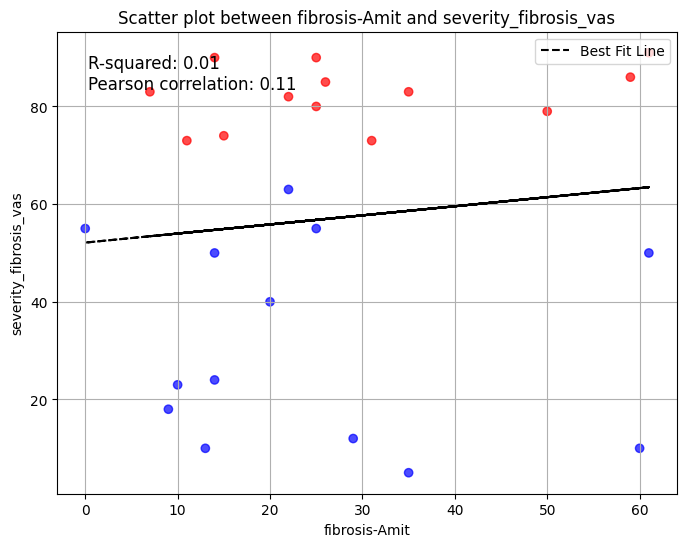

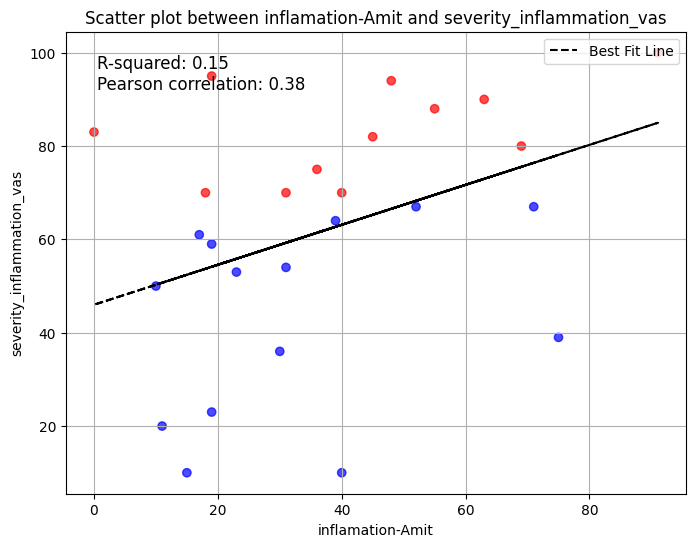

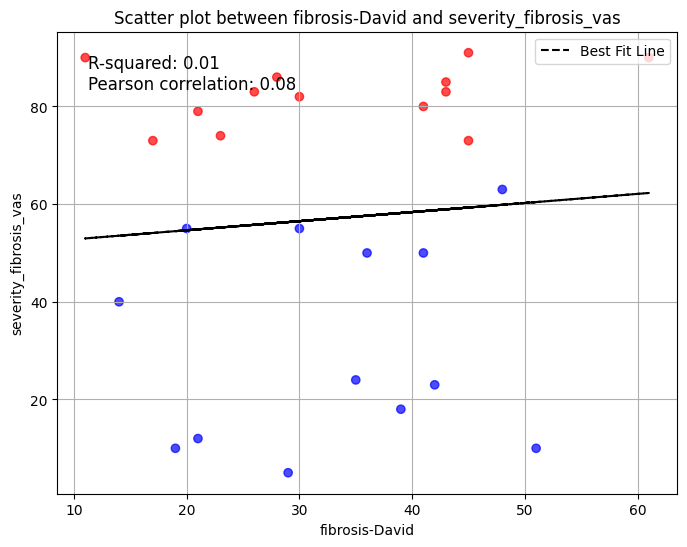

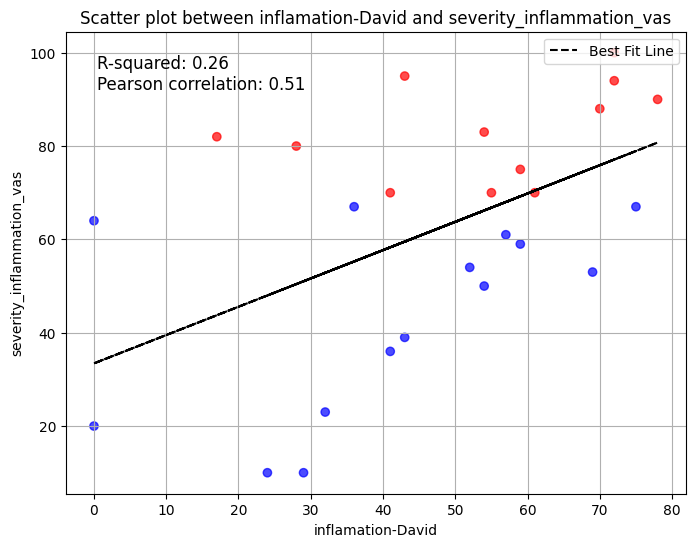

In [3]:
excel_file = r'C:\Users\chirr\OneDrive - Case Western Reserve University\MRE_Radiology-Scoring.xlsx'

sheet1 = pd.read_excel(excel_file, sheet_name='Amit-David-Combination pruned')
sheet2 = pd.read_excel(excel_file, sheet_name='MRE-Severity-Score-Sheet')

merged_df = pd.merge(sheet1, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
merged_df.drop(["record_id","alias_mrn"],axis=1,inplace=True)

#print(merged_df)
#output_csv = 'merged_output.csv'
#merged_df.to_csv(output_csv, index=False)
pairs_fibrosis=[('fibrosis-Amit','fibrosis-David'),('fibrosis-Amit','rvas-chronic_non_inflammation_f'),(('fibrosis-David','rvas-chronic_non_inflammation_f'))]
pairs_inflammation=[('inflammation-Amit','inflammation-David'),('inflammation-Amit','rvas-inflammation'),(('inflammation-David','rvas-inflammation'))]

#results_fibrosis=pg.intraclass_corr(data=merged_df,ratings=pairs_fibrosis)
#results_inflammation=pg.intraclass_corr(data=merged_df,ratings=pairs_inflammation)

#print(results_fibrosis)
#print(results_inflammation)

#scatter_with_best_fit("fibrosis-Amit", "fibrosis-David", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","inflamation-David",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("fibrosis-Amit", "rvas-chronic_non_inflammation_f", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","rvas-inflammation",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("fibrosis-Amit", "fibrosis-David", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","inflamation-David",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

scatter_with_best_fit("fibrosis-Amit", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
scatter_with_best_fit("inflamation-Amit","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

scatter_with_best_fit("fibrosis-David", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
scatter_with_best_fit("inflamation-David","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("rvas-chronic_non_inflammation_f", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("rvas-inflammation","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)


In [4]:
# Load Excel file for phase one  scoring
excel_file = r'C:\Users\chirr\OneDrive - Case Western Reserve University\MRE_Radiology-Scoring.xlsx'

sheet1 = pd.read_excel(excel_file, sheet_name='Amit-David Combination')
sheet2 = pd.read_excel(excel_file, sheet_name='MRE-Severity-Score-Sheet')


#This block is for merging phase one with the 
#merged_df = pd.merge(sheet1, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
#merged_df.drop(["record_id","alias_mrn"],axis=1,inplace=True)
#print(merged_df.head(5))
#output_csv = 'merged_output.csv'
#merged_df.to_csv(output_csv, index=False)


pairs_fibrosis=[('fibrosis-Amit','fibrosis-David'),('fibrosis-Amit','rvas-chronic_non_inflammation_f'),(('fibrosis-David','rvas-chronic_non_inflammation_f'))]
pairs_inflammation=[('inflammation-Amit','inflammation-David'),('inflammation-Amit','rvas-inflammation'),(('inflammation-David','rvas-inflammation'))]

In [5]:
#Reshuffle Phase 2 data

csv_file = r'C:\Users\chirr\Downloads\amit_phase2_scoring.csv'

amit_phase2 = pd.read_csv(csv_file)
amit_phase2.drop(columns=['user','updated_at', amit_phase2.columns[amit_phase2.columns.str.match('Unnamed')][0]], inplace=True)

columns_order = ['scored','studyUID','fibrosis','inflamation','inflamationConfidence','fibrosisConfidence']
amit_phase2 = amit_phase2[columns_order]

# Modify column names excluding 'scored' and 'studyUID'
for col in amit_phase2.columns:
    if col not in ['scored', 'studyUID']:
        amit_phase2.rename(columns={col: f'{col}-Amit-P2'}, inplace=True)

merged_df= pd.merge(sheet1, amit_phase2, how='inner', left_on='studyUID',right_on='studyUID')

print(merged_df.head(5))


                                       studyUID  patient_id  user  fibrosis  \
0  2.25.138093792598866614038735732787542158346    349077.0   NaN         0   
1  2.25.151381364609798322676278269381385726101    349083.0   NaN        35   
2  2.25.167372640697919929902164027163864542030    349086.0   NaN        26   
3  2.25.178449996666269068405877780772401025468    349088.0   NaN         0   
4  2.25.203973463754770981792232862473688168375    349087.0   NaN        14   

   inflamation  inflamationConfidence  fibrosisConfidence  fibrosis-David  \
0            0                      0                   0              43   
1           11                      2                   3              29   
2           36                      3                   2              43   
3            0                      0                   0               0   
4           40                      4                   3              36   

   inflamation-David  inflamationConfidence-David  fibrosisCon

In [6]:
#output_csv = 'merged_phase2_output.csv'
#merged_df.to_csv(output_csv, index=False)


In [7]:
#manually remove rows with nan scores or multiple zeros
merged_ph2_pruned_file = r"D:\Image_Processing_Demo\MRI processing_code\merged_phase2_output_pruned.csv"
merged_ph2_pruned = pd.read_csv(merged_ph2_pruned_file)
print(merged_ph2_pruned.head())

                                       studyUID  patient_id  user  fibrosis  \
0  2.25.151381364609798322676278269381385726101      349083   NaN        35   
1  2.25.167372640697919929902164027163864542030      349086   NaN        26   
2  2.25.203973463754770981792232862473688168375      349087   NaN        14   
3  2.25.216283113382784026636267261939114924832      349081   NaN        61   
4  2.25.221058046032357948728258383661711473328      349093   NaN        60   

   inflamation  inflamationConfidence  fibrosisConfidence  fibrosis-David  \
0           11                      2                   3              29   
1           36                      3                   2              43   
2           40                      4                   3              36   
3           15                      3                   5              41   
4           10                      3                   4              19   

   inflamation-David  inflamationConfidence-David  fibrosisCon

In [8]:
merged_ph2_pruned = pd.merge(merged_ph2_pruned, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
merged_ph2_pruned.drop(["record_id",'user',"alias_mrn"], axis=1,inplace=True)




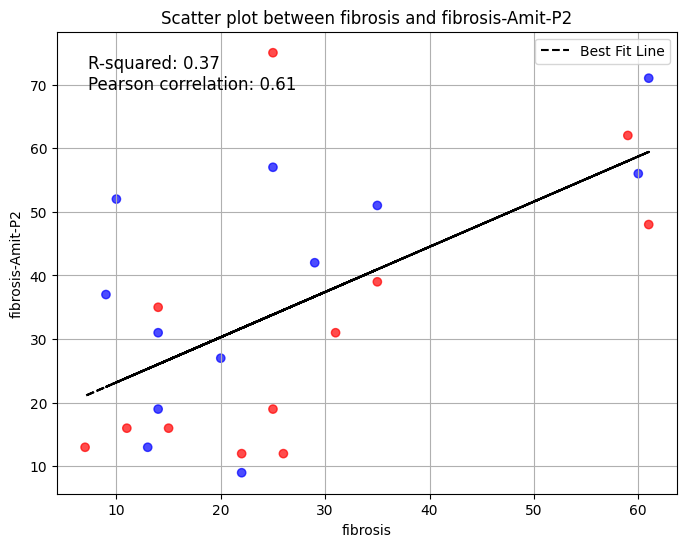

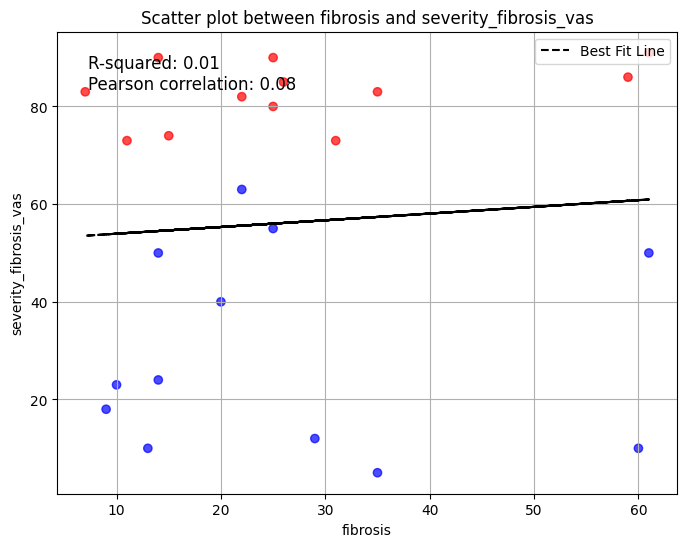

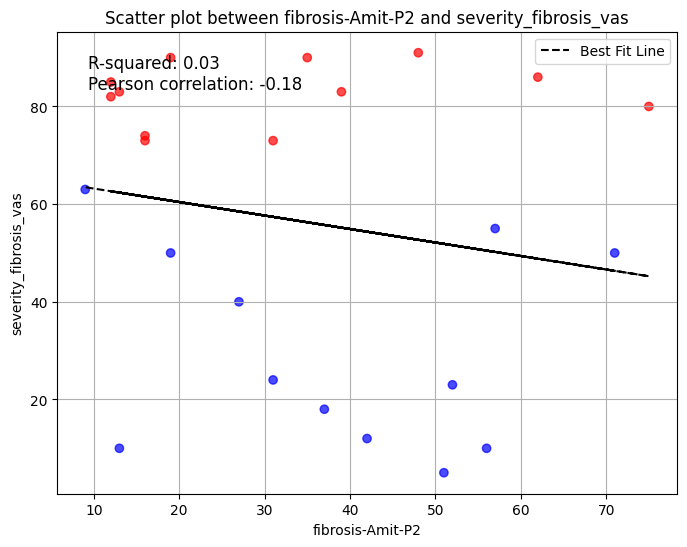

In [12]:
#pairs_fibrosis=[('fibrosis-Amit-P2','fibrosis-David'),('fibrosis','fibrosis-Amit-P2'),('fibrosis-Amit-P2','severity_fibrosis_vas'),]
#pairs_inflammation=[('inflammation-Amit-P2','inflammation-David'),('inflammation','inflammation-Amit-P2'),('inflammation-Amit-P2','severity_inflammation_vas')]
import matplotlib.pyplot as plt
import os

pairs_fibrosis=[('fibrosis','fibrosis-Amit-P2'),('fibrosis','severity_fibrosis_vas'),('fibrosis-Amit-P2','severity_fibrosis_vas')]
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

for  pairs in pairs_fibrosis:
    scatter_with_best_fit(pairs[0], pairs[1], merged_ph2_pruned, color=merged_ph2_pruned['Bin_sev_fib_co70'].values)

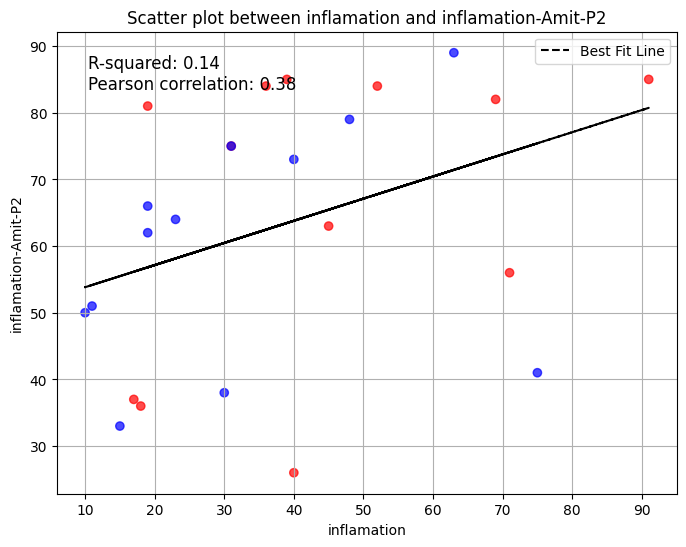

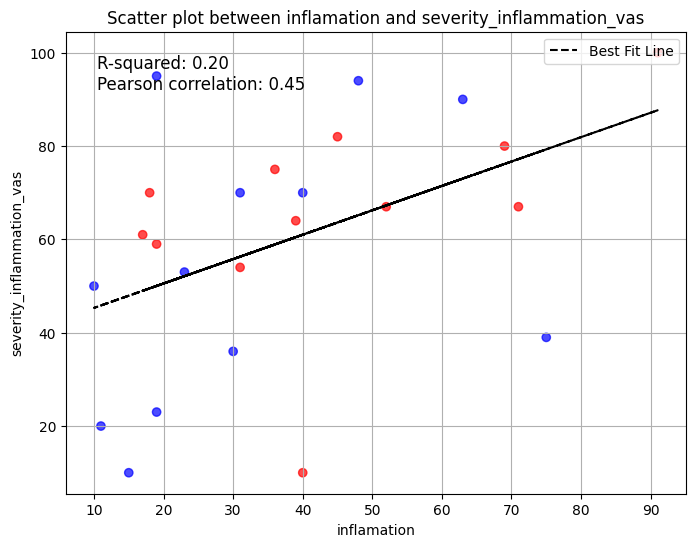

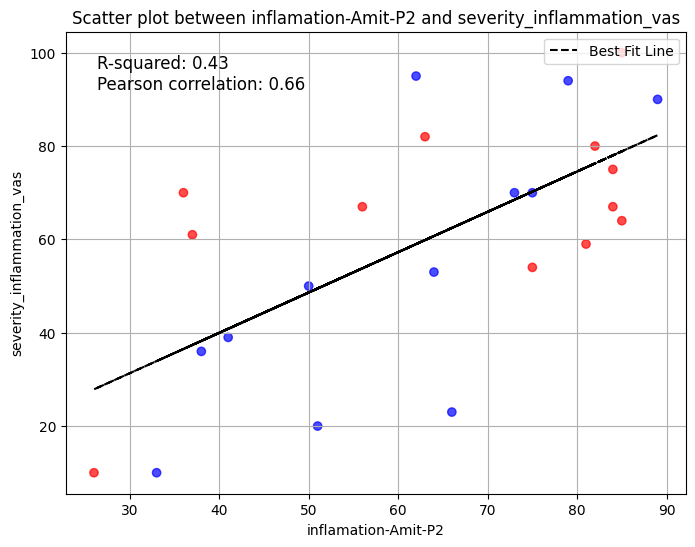

In [11]:
pairs_inflammation=[('inflamation','inflamation-Amit-P2'),('inflamation','severity_inflammation_vas'),('inflamation-Amit-P2','severity_inflammation_vas')]
for pairs in pairs_inflammation:
    scatter_with_best_fit(pairs[0],pairs[1], merged_ph2_pruned,color=merged_ph2_pruned['Bin_sev_fib_co70'].values)

In [ ]:
print(merged_ph2_pruned.keys())